In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import spines

In [ ]:
def K_m(V, S):
  return V[-1]*S[0]/V[0] - S[0]

In [ ]:
S = pd.read_csv('enzymes_1', sep = '\t', usecols = [0], header = None)
V = pd.read_csv('enzymes_1', sep = '\t', usecols = [1], header = None)

S = S.to_numpy(dtype = 'float')

V = V.to_numpy(dtype = 'float')


In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # function to show plot
    plt.show()

In [ ]:
K_m(V, S)

NameError: ignored

Text(0, 0.5, '$S/V_0$')

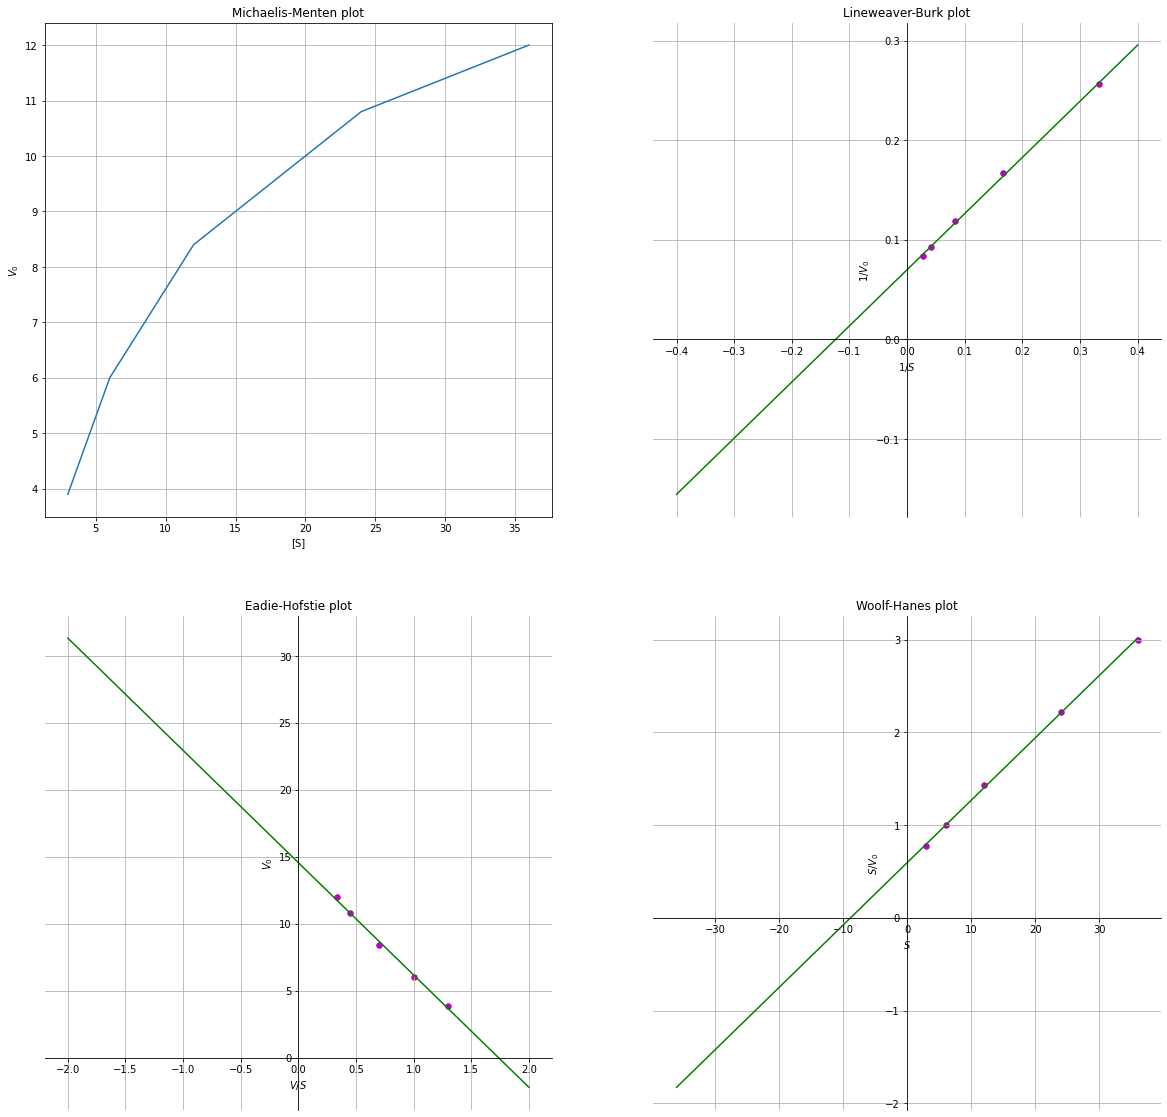

In [ ]:
plt.figure(figsize = [20, 20])

#michaelis-manten
plt.subplot(221)
plt.grid()
plt.plot(S, V)
plt.title('Michaelis-Menten plot')
plt.xlabel('[S]')
plt.ylabel('$V_0$')

#lineweaver-burk
x = S**-1
y = V**-1
X = np.linspace (-0.4, 0.4, 100)

plt.subplot(222)
plt.grid()
plt.title('Lineweaver-Burk plot')
b = estimate_coef(x, y)
plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred, color = "g")

plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position(('data', 0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$1/S$')
plt.ylabel('$1/V_0$')

#eadie-hofstie
x = V*(S**-1)
y = V
X = np.linspace (-2, 2, 100)

plt.subplot(223)
plt.grid()
plt.title('Eadie-Hofstie plot')
b = estimate_coef(x, y)
plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred, color = "g")

plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position(('data', 0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$V/S$')
plt.ylabel('$V_0$')

#woolf-hanes
x = S
y = S*(V**-1)
X = np.linspace (-36, 36, 100)

plt.subplot(224)
plt.grid()
plt.title('Woolf-Hanes plot')
b = estimate_coef(x, y)
plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred, color = "g")

plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position(('data', 0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('$S$')
plt.ylabel('$S/V_0$')


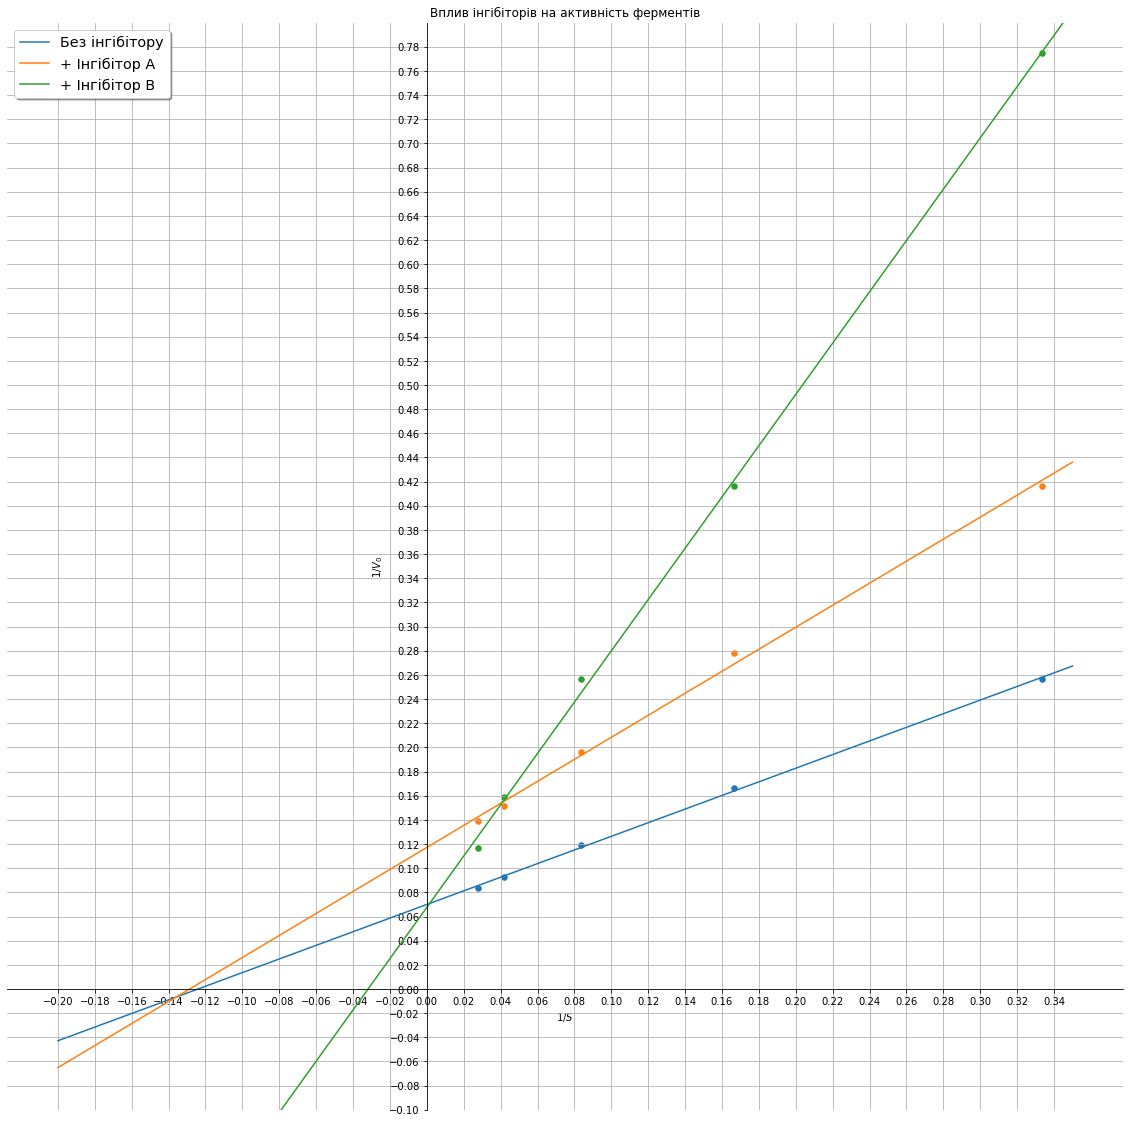

In [ ]:
#inhibitors 1

V_1 = pd.read_csv('enzymes_2', sep = '\t', usecols = [1], header = None)
V_1_A = pd.read_csv('enzymes_2', sep = '\t', usecols = [2], header = None)
V_1_B = pd.read_csv('enzymes_2', sep = '\t', usecols = [3], header = None)

V_1 = V_1.to_numpy(dtype = 'float')
V_1_A = V_1_A.to_numpy(dtype = 'float')
V_1_B = V_1_B.to_numpy(dtype = 'float')

plt.figure(figsize = [20, 20])
plt.grid()
plt.title('Вплив інгібіторів на активність ферментів')

x = S**-1
X = np.linspace (-0.2, 0.35, 100)

#enzyme1

y = V_1**-1

b = estimate_coef(x, y)
plt.scatter(x, y, 
            marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred,  label = 'Без інгібітору')

#enzyme2

y = V_1_A**-1

b = estimate_coef(x, y)
plt.scatter(x, y, 
            marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred,  label = '+ Інгібітор А')

#enzyme3

y = V_1_B**-1

b = estimate_coef(x, y)
plt.scatter(x, y, 
            marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred, label = '+ Інгібітор В')

plt.xlabel('$1/S$')
plt.ylabel('$1/V_0$')

plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position(('data', 0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylim((-0.1, 0.8))
plt.xticks(np.arange(-0.2, 0.35, step = 0.02))
plt.yticks(np.arange(-0.1, 0.8, step = 0.02))
plt.legend(loc='upper left', shadow=True, fontsize='x-large')

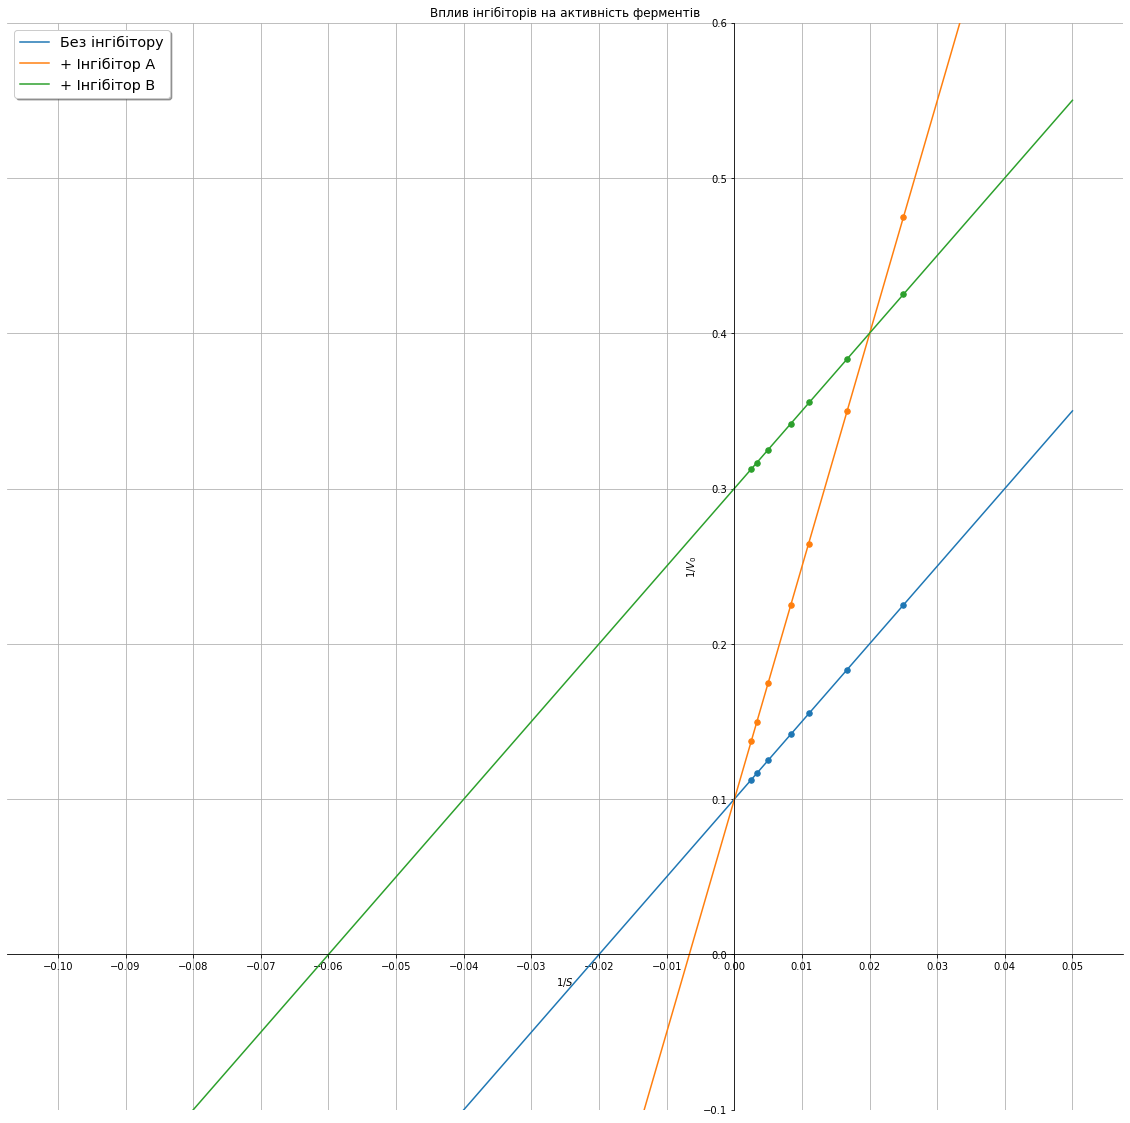

In [ ]:
#inhibitors 2

S_inh = np.array(pd.read_csv('enzymes_3', sep = '\t', usecols = [0], header = None), dtype = 'float')
V_2 = pd.read_csv('enzymes_3', sep = '\t', usecols = [1], header = None)
V_2_A = pd.read_csv('enzymes_3', sep = '\t', usecols = [2], header = None)
V_2_B = pd.read_csv('enzymes_3', sep = '\t', usecols = [3], header = None)

V_2 = V_2.to_numpy(dtype = 'float')
V_2_A = V_2_A.to_numpy(dtype = 'float')
V_2_B = V_2_B.to_numpy(dtype = 'float') 

plt.figure(figsize = [20, 20])
plt.grid()
plt.title('Вплив інгібіторів на активність ферментів')

x = S_inh**-1
X = np.linspace (-0.1, 0.05, 100)

#enzyme1

y = V_2**-1

b = estimate_coef(x, y)
plt.scatter(x, y, 
            marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred,  label = 'Без інгібітору')

#enzyme2

y = V_2_A**-1

b = estimate_coef(x, y)
plt.scatter(x, y, 
            marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred,  label = '+ Інгібітор А')

#enzyme3

y = V_2_B**-1

b = estimate_coef(x, y)
plt.scatter(x, y, 
            marker = "o", s = 30)
y_pred = b[0] + b[1]*X
plt.plot(X, y_pred, label = '+ Інгібітор В')

plt.xlabel('$1/S$')
plt.ylabel('$1/V_0$')

plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position(('data', 0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(np.arange(-0.1, 0.05, step = 0.01))
plt.ylim((-0.1, 0.6))
plt.legend(loc='upper left', shadow=True, fontsize='x-large')

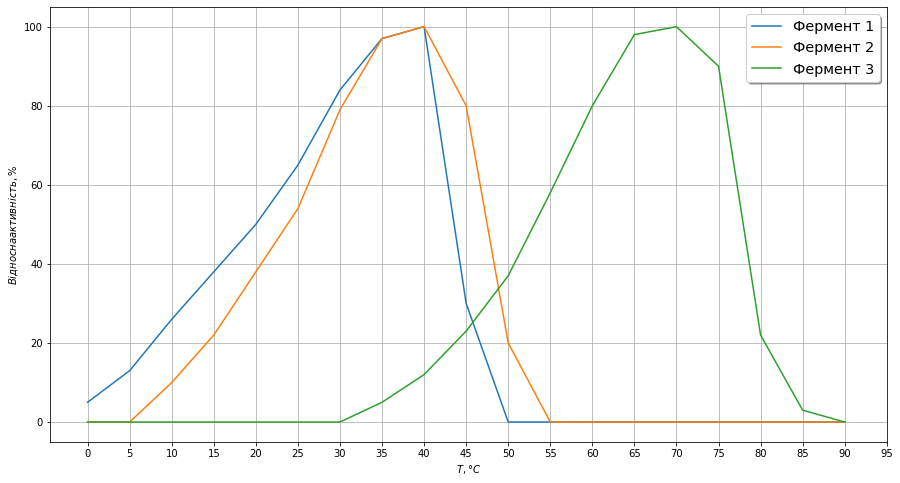

In [ ]:
t = pd.read_csv('enzymes_T',  sep = '\t', usecols = [0], header = None)
E1_t = pd.read_csv('enzymes_T', sep = '\t', usecols = [1], header = None)
E2_t = pd.read_csv('enzymes_T', sep = '\t', usecols = [2], header = None)
E3_t = pd.read_csv('enzymes_T', sep = '\t', usecols = [3], header = None)

fig, ax = plt.subplots(figsize = [15, 8])
plt.grid()
ax.plot(t, E1_t, label='Фермент 1')
ax.plot(t, E2_t, label='Фермент 2')
ax.plot(t, E3_t, label='Фермент 3')
plt.xticks(np.arange(0, 100, step = 5))
plt.xlabel('$T, \degree C $')
plt.ylabel('$Відносна активність, \% $')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

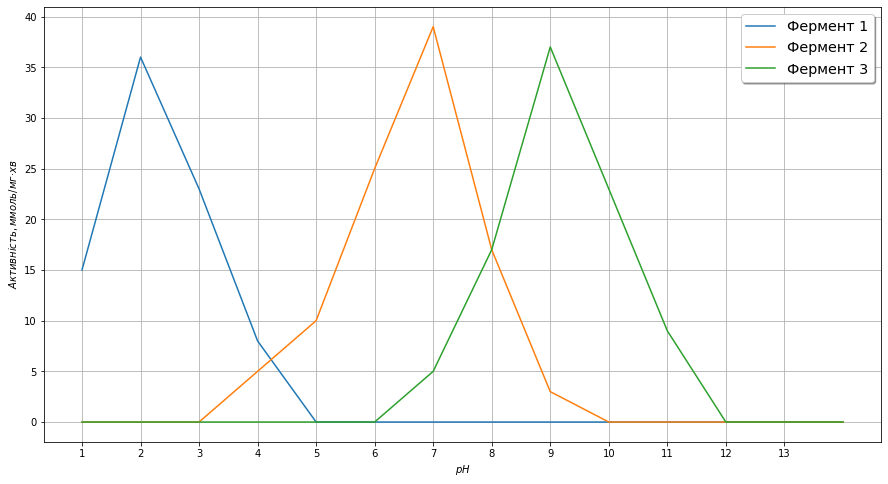

In [ ]:
pH = pd.read_csv('enzymes_pH',  sep = '\t', usecols = [0], header = None)
E1_pH = pd.read_csv('enzymes_pH', sep = '\t', usecols = [1], header = None)
E2_pH = pd.read_csv('enzymes_pH', sep = '\t', usecols = [2], header = None)
E3_pH = pd.read_csv('enzymes_pH', sep = '\t', usecols = [3], header = None)

fig, ax = plt.subplots(figsize = [15, 8])
plt.grid()
ax.plot(pH, E1_pH, label='Фермент 1')
ax.plot(pH, E2_pH, label='Фермент 2')
ax.plot(pH, E3_pH, label='Фермент 3')
plt.xticks(np.arange(1, 14, step = 1))
plt.xlabel('$pH$')
plt.ylabel('$Активність, ммоль/мг \dot хв$')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')


Text(0, 0.5, '$1/V_0$')

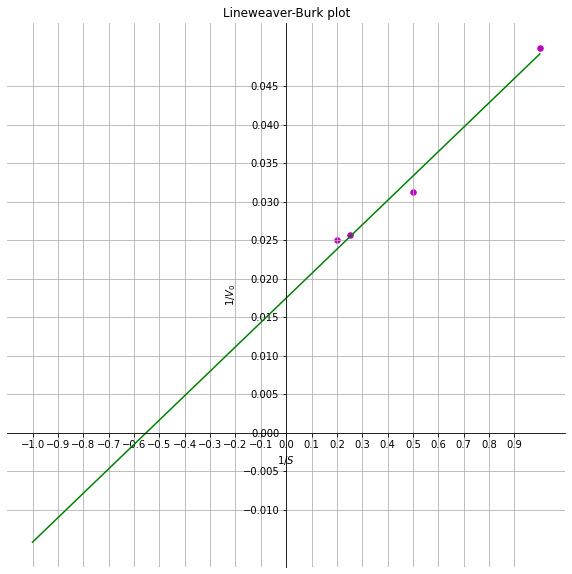

In [ ]:
S = np.array([1/5, 1/4, 1/2, 1])
V = np.array([1/40, 1/39, 1/32, 1/20])

X = np.linspace (-1, 1, 100)

plt.figure(figsize = (10, 10))
plt.grid()
plt.title('Lineweaver-Burk plot')
b = estimate_coef(S, V)
plt.scatter(S, V, color = "m",
               marker = "o", s = 30)
V_pred = b[0] + b[1]*X
plt.plot(X, V_pred, color = "g")

plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position(('data', 0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(-1, 1, step = 0.1))
plt.yticks(np.arange(-0.01, 0.05, step = 0.005))
plt.xlabel('$1/S$')
plt.ylabel('$1/V_0$')



In [ ]:
p_d = 1/101
p_b = 0 
for i in range (1, 101):
  p_b += i/100

print(p_b)
print(p_b*p_d)


50.5
0.5
